Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Using Classifier as listed below
1.Logistic Regression
2.KNN
3.SVM
4.Decision Tree
5.Random Forest
6.Naive Bayes

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
ckd_dataset = pd.read_csv('kidney_disease.csv')

In [4]:
ckd_dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
ckd_dataset.shape

(400, 26)

In [6]:
ckd_dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
ckd_dataset['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [8]:
ckd_dataset.groupby('classification').mean()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,,
ckd,124.427419,54.425000,79.705882,1.013937,1.721154,0.770732,175.523810,72.656170,4.430720,133.882530,4.883030,10.652217
ckd\t,133.500000,68.500000,70.000000,1.010000,2.000000,0.000000,164.500000,41.000000,2.550000,135.500000,4.500000,9.700000
notckd,324.500000,46.516779,71.351351,1.022414,0.000000,0.000000,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194


In [9]:
features = ckd_dataset.drop(columns = 'classification', axis=1)
target = ckd_dataset['classification']

In [10]:
print(features)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  hemo  pcv    wc   rc  htn   dm cad appet   pe  ane  
0    notpresent  ...  15.4   44  7800  5.2  yes  yes  no  good   no   no

In [11]:
print(target)

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object


In [12]:
ckd_dataset.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [13]:
ckd_dataset = ckd_dataset.rename(columns={'bp': 'blood_pressure','sg': 'specific_gravity','al': 'albumin','su': 'sugar',
                   'rbc': 'red_blood_cells','pc': 'pus_cell','pcc': 'pus_cell_clumps','ba': 'bacteria',
                   'bgr': 'blood_glucose_random','bu': 'blood_urea','sc': 'serum_creatinine',
                   'sod': 'sodium','pot': 'potassium','hemo': 'hemoglobin','pcv': 'packed_cell_volume',
                   'wc': 'white_blood_cell','rc': 'red_blood_cell','htn': 'hypertension','dm': 'diabetes_mellitus',
                   'cad': 'coronary_artery_disease','appet': 'appetite','pe': 'pedal_edema','ane': 'anemia'})


In [14]:
ckd_dataset['white_blood_cell'] = pd.to_numeric(ckd_dataset['white_blood_cell'], errors='coerce')
ckd_dataset['red_blood_cell'] = pd.to_numeric(ckd_dataset['red_blood_cell'], errors='coerce')
ckd_dataset['packed_cell_volume'] = pd.to_numeric(ckd_dataset['packed_cell_volume'], errors='coerce')


In [15]:
ckd_dataset.red_blood_cells = ckd_dataset.red_blood_cells.map({ 'normal' : 1, 'abnormal' : 0})
ckd_dataset.pus_cell = ckd_dataset.pus_cell.map({ 'normal' : 1, 'abnormal' : 0})
ckd_dataset.pus_cell_clumps = ckd_dataset.pus_cell_clumps.map({ 'present' : 1, 'notpresent' : 0})
ckd_dataset.bacteria = ckd_dataset.bacteria.map({ 'present' : 1, 'notpresent' : 0})
ckd_dataset.hypertension = ckd_dataset.hypertension.map({ 'yes' : 1, 'no' : 0})
ckd_dataset.diabetes_mellitus = ckd_dataset.diabetes_mellitus.map({ 'yes' : 1, '\tyes' : 1, '\tno' : 0, 'no' : 0})
ckd_dataset.coronary_artery_disease = ckd_dataset.coronary_artery_disease.map({ 'yes' : 1, 'no' : 0, '\tno' : 0})
ckd_dataset.appetite = ckd_dataset.appetite.map({ 'good' : 1, 'poor' : 0})
ckd_dataset.pedal_edema = ckd_dataset.pedal_edema.map({ 'yes' : 1, 'no' : 0})
ckd_dataset.anemia = ckd_dataset.anemia.map({ 'yes' : 1, 'no' : 0})
ckd_dataset.classification = ckd_dataset.classification.map({ 'ckd' : 1, 'notckd' : 0})

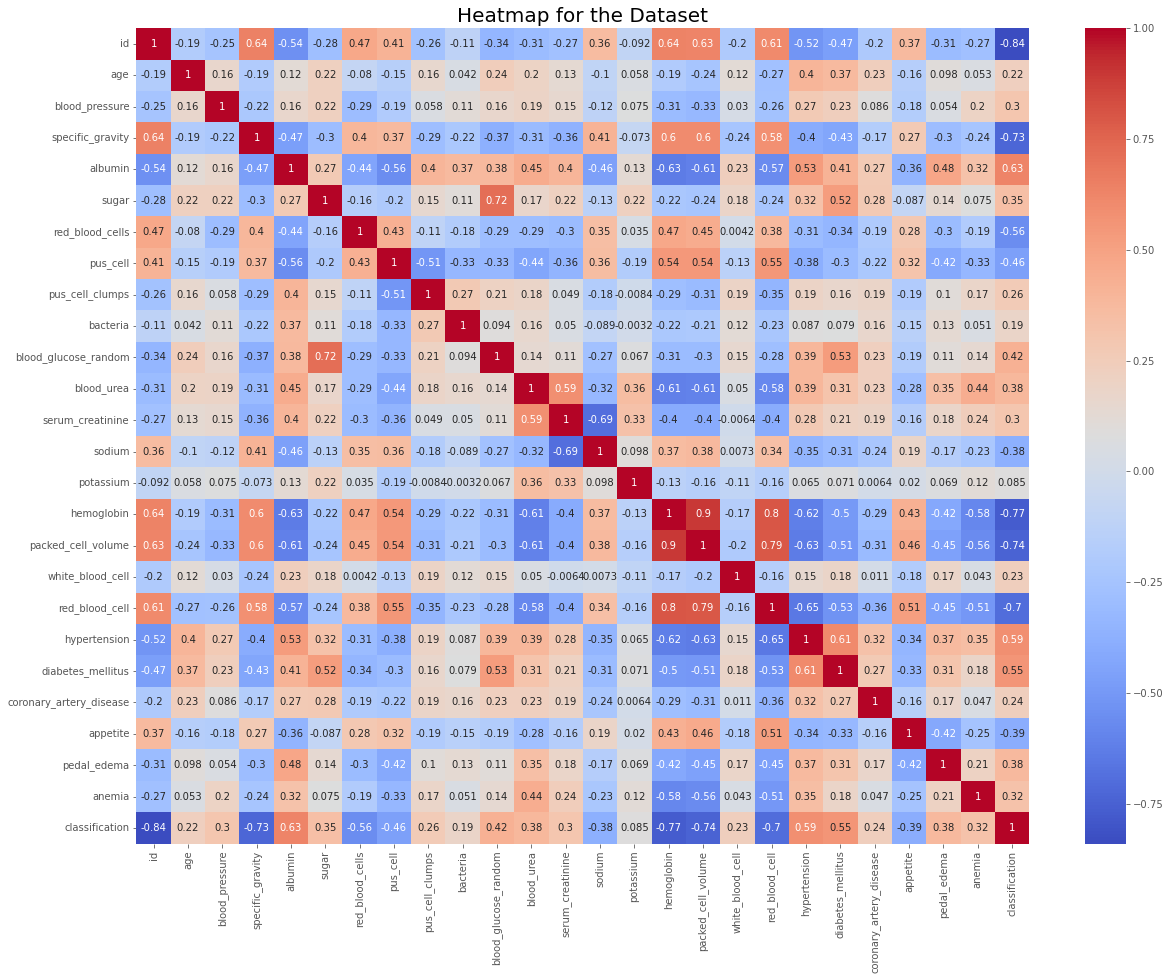

In [16]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(ckd_dataset.corr(), annot = True, cmap = 'coolwarm')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

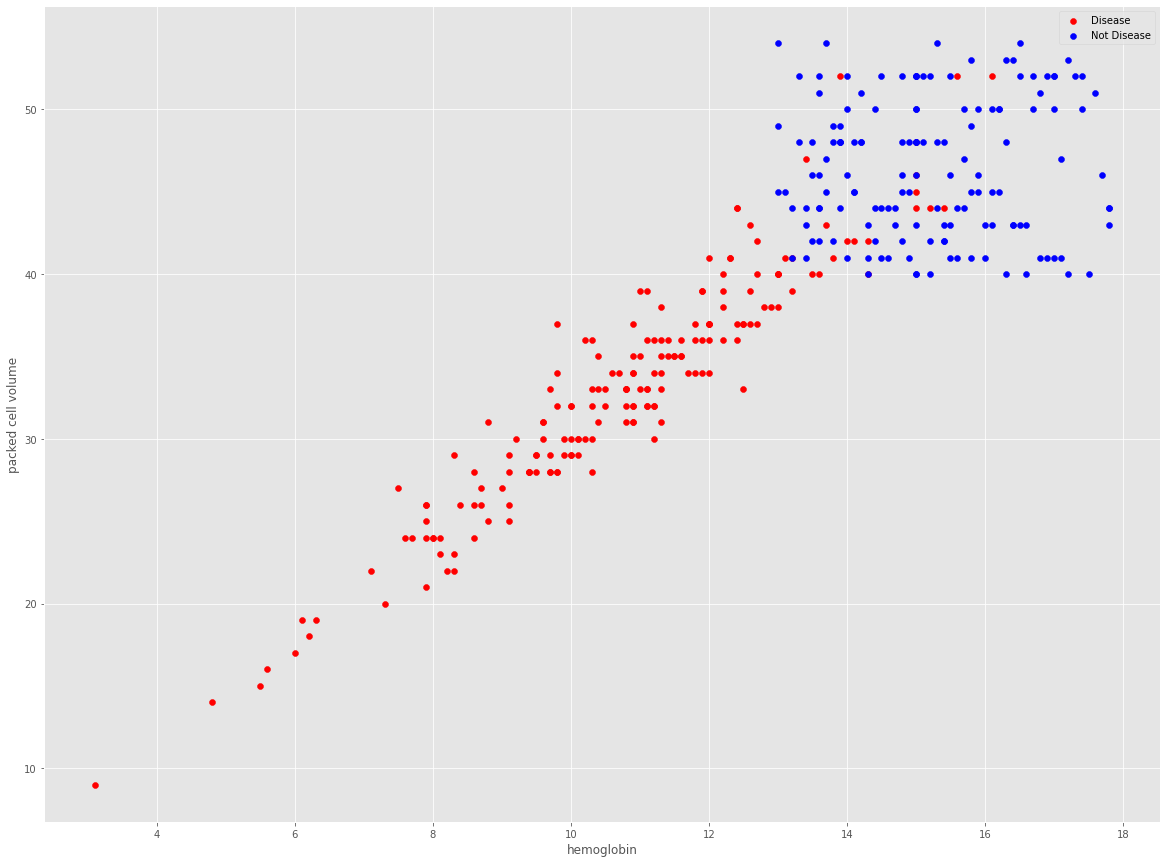

In [17]:
plt.scatter(x=ckd_dataset.hemoglobin[ckd_dataset.classification==1], y=ckd_dataset.packed_cell_volume[(ckd_dataset.classification==1)], c="red")
plt.scatter(x=ckd_dataset.hemoglobin[ckd_dataset.classification==0], y=ckd_dataset.packed_cell_volume[(ckd_dataset.classification==0)], c="blue")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("hemoglobin")
plt.ylabel("packed cell volume")
plt.show()

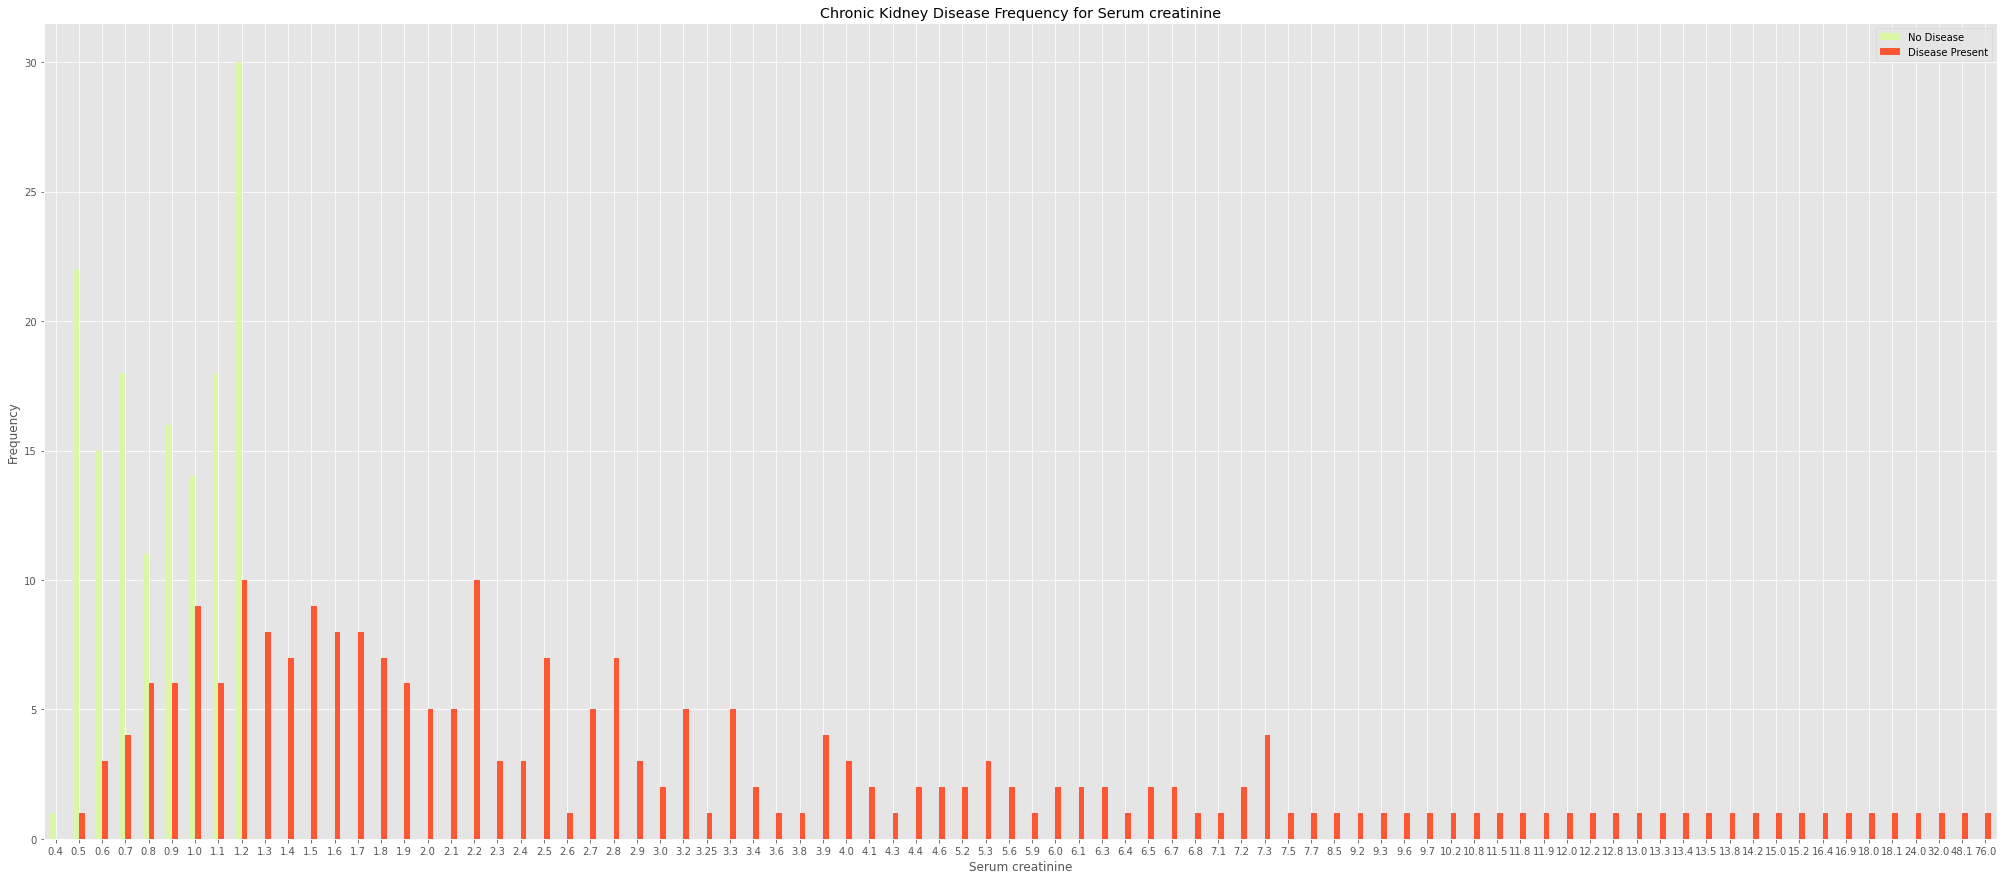

In [18]:
pd.crosstab(ckd_dataset.serum_creatinine,ckd_dataset.classification).plot(kind="bar",figsize=(35,15),color=['#DAF7A6','#FF5733'])
plt.title('Chronic Kidney Disease Frequency for Serum creatinine')
plt.xlabel('Serum creatinine')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease Present"])
plt.ylabel('Frequency')
plt.show()

In [19]:
def fill_nans():
    """
    Fill the null values of each column with its median value
    created under new column names ending with '_filled'

    :return: A dataframe where the columns of data type float64 have their NaN values replaced
             with the median of each column under a new column name ending with '_filled'
    """        
    for col in ckd_dataset.columns:
        if ckd_dataset[col].dtype == 'float64':
            ckd_dataset[col] = ckd_dataset[col].transform(lambda x: x.fillna(x.median()))
    return ckd_dataset

fill_nans()


,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell,red_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


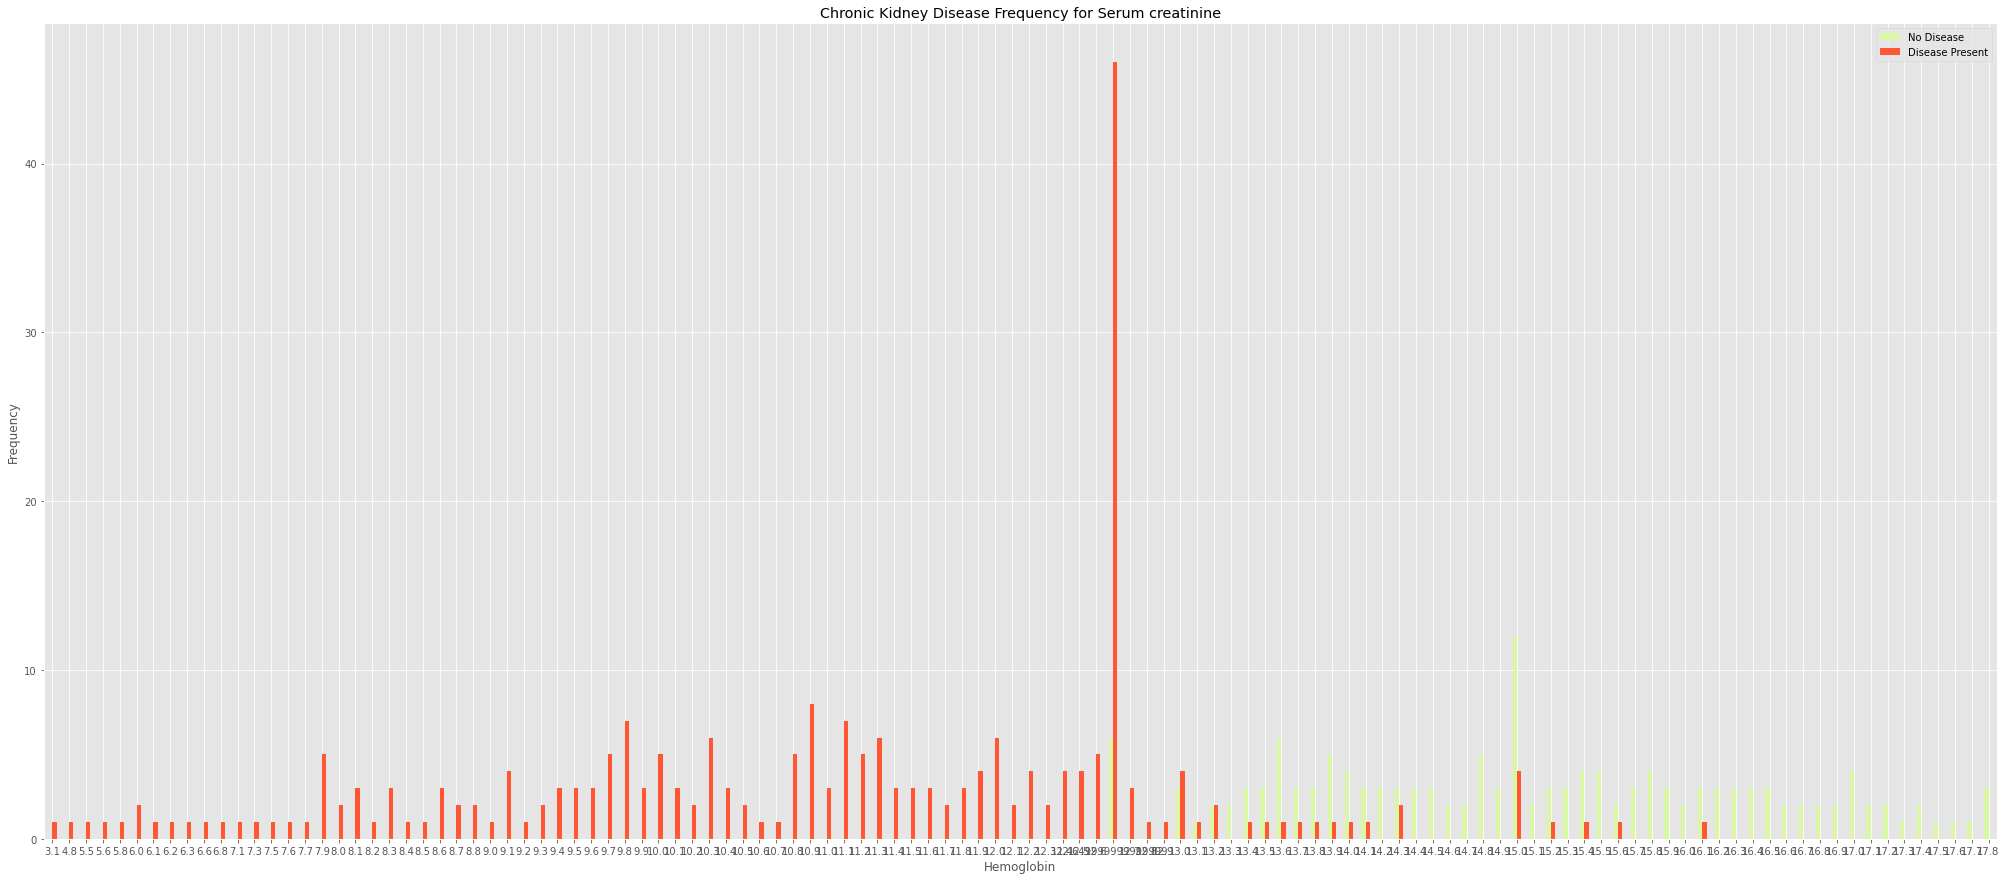

In [20]:
pd.crosstab(ckd_dataset.hemoglobin,ckd_dataset.classification).plot(kind="bar",figsize=(35,15),color=['#DAF7A6','#FF5733'])
plt.title('Chronic Kidney Disease Frequency for Serum creatinine')
plt.xlabel('Hemoglobin')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Disease Present"])
plt.ylabel('Frequency')
plt.show()

In [21]:
ckd_dataset.isnull().sum()


id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell           0
red_blood_cell             0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [22]:
features = ckd_dataset.drop(columns = 'classification', axis=1)
target = ckd_dataset['classification']

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(features)

StandardScaler()

In [25]:
standardized_data = scaler.transform(features)

In [26]:
print(standardized_data)

[[-1.72772608 -0.21003135  0.25421378 ...  0.50780078 -0.4843221
  -0.42008403]
 [-1.7190658  -2.62723421 -1.97247624 ...  0.50780078 -0.4843221
  -0.42008403]
 [-1.71040552  0.615355    0.25421378 ... -1.96927621 -0.4843221
   2.38047614]
 ...
 [ 1.71040552 -2.33245337  0.25421378 ...  0.50780078 -0.4843221
  -0.42008403]
 [ 1.7190658  -2.03767254 -1.23024623 ...  0.50780078 -0.4843221
  -0.42008403]
 [ 1.72772608  0.37953033  0.25421378 ...  0.50780078 -0.4843221
  -0.42008403]]


In [27]:
features = standardized_data
target = ckd_dataset['classification'] 

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [29]:
print(features.shape, X_train.shape, X_test.shape)

(400, 25) (320, 25) (80, 25)


In [30]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(C=.1, degree=1, kernel='poly', probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression()]


In [31]:
models_with_accuracy={}

In [32]:
for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    try:
        print('****Results****')
        
        X_train_prediction = clf.predict(X_train)
        training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
        print(" Training Accuracy: {:.4%}".format(training_data_accuracy))
        
        X_test_prediction = clf.predict(X_test)
        test_data_accuracy = accuracy_score( Y_test, X_test_prediction)
        print(" Test Accuracy: {:.4%}".format(test_data_accuracy))
        models_with_accuracy[clf]= test_data_accuracy 
        

    except Exception as e:
        print (e)
    
print("="*30)

KNeighborsClassifier
****Results****
 Training Accuracy: 98.4375%
 Test Accuracy: 97.5000%
SVC
****Results****
 Training Accuracy: 99.0625%
 Test Accuracy: 98.7500%
DecisionTreeClassifier
****Results****
 Training Accuracy: 100.0000%
 Test Accuracy: 100.0000%
RandomForestClassifier
****Results****
 Training Accuracy: 100.0000%
 Test Accuracy: 100.0000%
GaussianNB
****Results****
 Training Accuracy: 96.5625%
 Test Accuracy: 96.2500%
LogisticRegression
****Results****
 Training Accuracy: 100.0000%
 Test Accuracy: 100.0000%


In [33]:
models_with_accuracy

{KNeighborsClassifier(): 0.975,
 SVC(C=0.1, degree=1, kernel='poly', probability=True): 0.9875,
 DecisionTreeClassifier(): 1.0,
 RandomForestClassifier(): 1.0,
 GaussianNB(): 0.9625,
 LogisticRegression(): 1.0}

In [34]:
max_key = max(models_with_accuracy, key=models_with_accuracy.get)
classifier = max_key

In [35]:
input_data =[0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0]
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
if (prediction == 0):
  print('The person is not ckd')
else:
  print('The person is ckd')
print(prediction)

The person is ckd
[1.]


In [36]:
pd.set_option('display.max_columns', None)
ckd_dataset

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell,red_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
